In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
# Load dataset
df = pd.read_csv("/content/Iris (2).csv")  # make sure file is in the same folder or give full path
df




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [25]:
X = df.drop('Species', axis=1)
y = df['Species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 5)
Target shape: (150,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



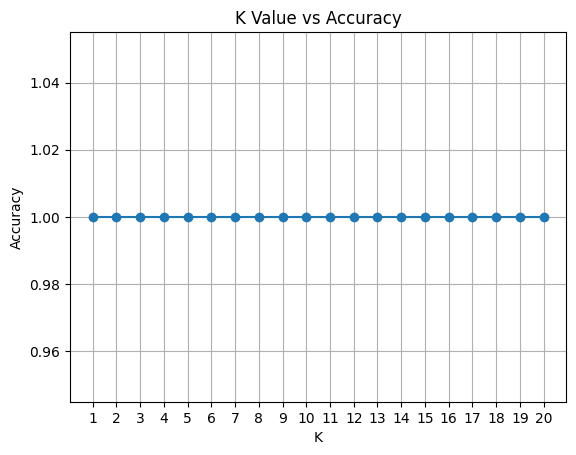

In [30]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


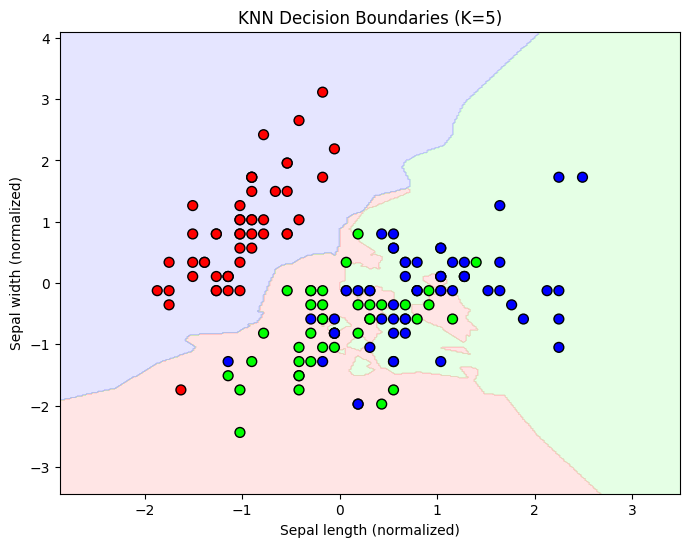

In [33]:
from matplotlib.colors import ListedColormap

# Select only two features for visualization
X_vis = df[['SepalLengthCm','SepalWidthCm']].values
y_vis = df['Species'].values


# Normalize
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(X_vis)

# Train KNN for visualization
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each grid point and convert to integers
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.factorize(Z)[0]  # Convert class labels to integers
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y_vis)[0], cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Sepal length (normalized)')
plt.ylabel('Sepal width (normalized)')
plt.title('KNN Decision Boundaries (K=5)')
plt.show()


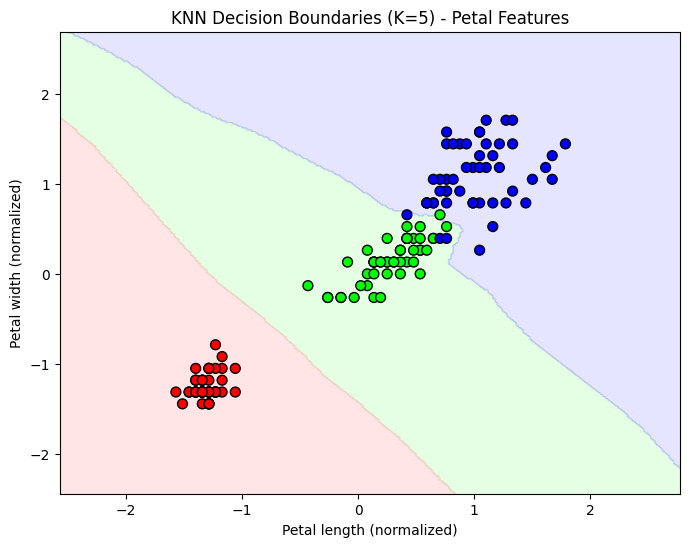

In [35]:
from matplotlib.colors import ListedColormap

# Select petal length & petal width
X_vis = df[['PetalLengthCm','PetalWidthCm']].values
y_vis = df['Species'].values

# Normalize
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(X_vis)

# Train KNN
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for grid & convert to numeric
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.factorize(Z)[0]
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y_vis)[0], cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Petal length (normalized)')
plt.ylabel('Petal width (normalized)')
plt.title('KNN Decision Boundaries (K=5) - Petal Features')
plt.show()
